# DONE BY:
## Juan Carlos Eraso, cod: 201127829
## Carlos Quispe Castilla, cod: 201627368


________________

## Exercise 05

# Neural networks


## 4.1 Little Red Riding Hood Network

Train a neural network to solve the  Little Red Riding Hood problem in sklern and Keras. Try the neural networ with different inputs and report the results.

________________

## 4.2 Boston House Price Prediction

In the next questions we are going to work using the dataset *Boston*. This dataset measures the influence of socioeconomical factors on the price of several estates of the city of Boston. This dataset has 506 instances, each one characterized by 13 features:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per 10,000 USD
* PTRATIO - pupil-teacher ratio by town
* B - $1000(Bk - 0.63)^2$ where $Bk$ is the proportion of blacks by town
* LSTAT - % lower status of the population

Output variable:
* MEDV - Median value of owner-occupied homes in 1000's USD

**Note:** In this exercise we are going to predict the price of each estate, which is represented in the `MEDV` variable. It is important to remember that we are always aiming to predict `MEDV`, no matter which explanatory variables we are using. That means, in some cases we will use a subset of the 13 previously mentioned variables, while in other cases we will use all the 13 variables. But in no case we will change the dependent variable $y$.



1. Load the dataset using `from sklearn.datasets import load_boston`.
2. Create a DataFrame using the attribute `.data` from the loading function of Scikit-learn.
3. Assign the columns of the DataFrame so they match the `.feature_names` attribute from the loading function of Scikit-learn. 
4. Assign a new column to the DataFrame which holds the value to predict, that means, the `.target` attribute of the loading function of Scikit-learn. The name of this columns must be `MEDV`.
5. Use the function `.describe()` from Pandas for obtaining statistics about each column.

## 4.3 Feature analysis:

Using the DataFrame generated in the previous section:
* Filter the dataset to just these features:
     * Explanatory: 'LSTAT', 'INDUS', 'NOX', 'RM', 'AGE'
     * Dependent: 'MEDV'.
* Generate a scatter matrix among the features mentioned above using Pandas (`scatter_matrix`) or Seaborn (` pairplot`).
     * Do you find any relationship between the features?
* Generate the correlation matrix between these variables using `numpy.corrcoef`. Also include `MEDV`.
     * Which characteristics are more correlated?
     * BONUS: Visualize this matrix as heat map using Pandas, Matplotlib or Seaborn.

## 4.4 Modeling linear and non linear relationships

* Generate two new subsets filtering these characteristics:
     * $D_1$:  $X = \textit{'RM'}$, $y = \textit{'MEDV'}$
     * $D_2$:  $X = \textit{'LSTAT'}$, $y = \textit{'MEDV'}$
* For each subset, generate a training partition and a test partition using a ratio of $ 70 \% - 30 \% $
* Train a linear regression model on both subsets of data:
     * Report the mean square error on the test set
     * Print the values of $ w $ and $ w_0 $ of the regression equation
     * Generate a graph where you visualize the line obtained by the regression model in conjunction with the training data and the test data
* How does the model perform on $ D_1 $ and $ D_2 $? Why?

## 4.5 Training a regression model

* Generate a 70-30 partitioning of the data **using all the features**. (Do not include the dependent variable `MEDV`)
* Train a linear regression model with the objective of predicting the output variable `MEDV`.
     * Report the mean square error on the test set
* Train a regression model using `MLPRegressor` in order to predict the output variable` MEDV`.
     * Report the mean square error on the test set
* Scale the data so that they have zero mean variance one per feature (only $ X $). You can use the following piece of code:

```python
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_x.fit(X)
X_train_s = sc_x.transform(X_train)
X_test_s = sc_x.transform(X_test)
```
Check more information about `StandardScaler` [here](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

* Train the following models:
     1. Train a linear regression model using the scaled data.
         * Report the mean square error on the test set
     2. Train a regression model using a 2-layer MultiLayer Perceptron (128 neurons in the first and 512 in the second) and with the **scaled data**.
         * Report the mean square error on the test set
     3. Which model has better performance? Why?

## EXERCISE # 4.1

In [12]:
#First, we build the NN from sklearn

import numpy as np
from sklearn.neural_network import MLPClassifier

#Then create the inputs to train the model
X=np.array([(1,1,0,0),(0,1,1,0),(0,0,0,1)])
y=np.array([(1,0,0,0),(0,0,1,1),(0,1,1,0)])

#Finally, we use multi-layer perceptrons to optimize the log-loss function
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(4, 2), random_state=1)

#And we train it
clf.fit(X, y)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(4, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [15]:
#take a look if the outcomes are close to reallity
clf.predict([[0,1,1,0], [0,0,0,1]])

#Big Ears  Big Teeth  Handsome  Wrinkled
#Scream  Hug  Food  Kiss

array([[0, 0, 1, 1],
       [0, 1, 1, 0]])

In [16]:
#and try with different combinations to see its outcomes
clf.predict([[1,1,1,1], [0,0,0,0], [1,1,1,0]])

#Big Ears  Big Teeth  Handsome  Wrinkled
#Scream  Hug  Food  Kiss

array([[0, 1, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0]])

In [22]:
#Then, we try to solve the same problem with Keras

from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()

model.add(Dense(units=3, input_dim=4))
model.add(Activation('relu'))
model.add(Dense(units=4))
model.add(Activation('sigmoid'))

In [23]:
model.summary(70)

______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_5 (Dense)                (None, 3)                   15         
______________________________________________________________________
activation_5 (Activation)      (None, 3)                   0          
______________________________________________________________________
dense_6 (Dense)                (None, 4)                   16         
______________________________________________________________________
activation_6 (Activation)      (None, 4)                   0          
Total params: 31
Trainable params: 31
Non-trainable params: 0
______________________________________________________________________


In [24]:
from keras.optimizers import SGD
model.compile(loss = 'binary_crossentropy',
              optimizer = SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=False),
              metrics = ['accuracy'])

In [25]:
model.fit(X, y, epochs=100, verbose=2)

Epoch 1/100
 - 1s - loss: 0.7511 - acc: 0.4167
Epoch 2/100
 - 0s - loss: 0.7504 - acc: 0.4167
Epoch 3/100
 - 0s - loss: 0.7491 - acc: 0.4167
Epoch 4/100
 - 0s - loss: 0.7472 - acc: 0.5000
Epoch 5/100
 - 0s - loss: 0.7448 - acc: 0.5000
Epoch 6/100
 - 0s - loss: 0.7420 - acc: 0.5000
Epoch 7/100
 - 0s - loss: 0.7389 - acc: 0.5000
Epoch 8/100
 - 0s - loss: 0.7354 - acc: 0.5000
Epoch 9/100
 - 0s - loss: 0.7317 - acc: 0.5000
Epoch 10/100
 - 0s - loss: 0.7277 - acc: 0.5000
Epoch 11/100
 - 0s - loss: 0.7236 - acc: 0.5000
Epoch 12/100
 - 0s - loss: 0.7193 - acc: 0.5000
Epoch 13/100
 - 0s - loss: 0.7148 - acc: 0.5000
Epoch 14/100
 - 0s - loss: 0.7103 - acc: 0.5000
Epoch 15/100
 - 0s - loss: 0.7057 - acc: 0.5000
Epoch 16/100
 - 0s - loss: 0.7011 - acc: 0.5833
Epoch 17/100
 - 0s - loss: 0.6964 - acc: 0.5833
Epoch 18/100
 - 0s - loss: 0.6917 - acc: 0.5833
Epoch 19/100
 - 0s - loss: 0.6871 - acc: 0.5833
Epoch 20/100
 - 0s - loss: 0.6824 - acc: 0.5833
Epoch 21/100
 - 0s - loss: 0.6777 - acc: 0.5833
E

In [35]:
#take a look if the outcomes are close to reallity

#Big Ears  Big Teeth  Handsome  Wrinkled
#Scream  Hug  Food  Kiss
a=model.predict(np.array([[0,0,0,1]]))
np.round([a])

array([[[0., 1., 1., 0.]]], dtype=float32)

In [36]:
#take a look if the outcomes are close to reallity

#Big Ears  Big Teeth  Handsome  Wrinkled
#Scream  Hug  Food  Kiss
a=model.predict(np.array([[1,1,0,0]]))
np.round([a])

array([[[1., 0., 0., 0.]]], dtype=float32)

In [37]:
#and try with different combinations to see its outcomes

#Big Ears  Big Teeth  Handsome  Wrinkled
#Scream  Hug  Food  Kiss
a=model.predict(np.array([[1,1,1,1]]))
np.round([a])

array([[[1., 0., 0., 0.]]], dtype=float32)

In [38]:
#and try with different combinations to see its outcomes

#Big Ears  Big Teeth  Handsome  Wrinkled
#Scream  Hug  Food  Kiss
a=model.predict(np.array([[0,0,0,0]]))
np.round([a])

array([[[0., 0., 1., 0.]]], dtype=float32)

## EXERCISE # 4.2

In [7]:
import pandas as pd
from sklearn.datasets import load_boston

#We import the dataset
Boston = load_boston()
boston=pd.DataFrame(Boston.data)

In [8]:
#We import the column names
boston.columns = Boston.feature_names
print(boston.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


In [9]:
#And the dependent variable
boston['MEDV'] = Boston.target
print(boston.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [10]:
#We use the function 'describe' for obtaining statistics about every variable

from sklearn.model_selection import train_test_split
import numpy as np
print(boston.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.593761   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.596783   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.647423   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [11]:
#After that, we can create train/test datasets

from sklearn.model_selection import train_test_split

y = boston['MEDV']
X = boston.drop('MEDV', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("Training dataset shape (X, y):", X_train.shape, y_train.shape)

Training dataset shape (X, y): (404, 13) (404,)


In [99]:
#And star to set the NN MLPRegresor model

n_hidden_neurons = 20
nn = MLPRegressor(activation='logistic', solver='lbfgs', hidden_layer_sizes=(n_hidden_neurons,))
nn

MLPRegressor(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [100]:
#We fit the train dataset

nn.fit(X_train, y_train)

MLPRegressor(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [101]:
#And look for performance indicators

from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(y_train, nn.predict(X_train))
test_mse = mean_squared_error(y_test, nn.predict(X_test))
print("Training_MSE:", train_mse)
print("Testing_MSE: ", test_mse)

Training MSE: 63.47513584170388
Testing MSE:  91.97685529595867


In [107]:
#Then, we retrieve an observation to do validation

boston.iloc[30]

CRIM         1.13081
ZN           0.00000
INDUS        8.14000
CHAS         0.00000
NOX          0.53800
RM           5.71300
AGE         94.10000
DIS          4.23300
RAD          4.00000
TAX        307.00000
PTRATIO     21.00000
B          360.17000
LSTAT       22.60000
MEDV        12.70000
Name: 30, dtype: float64

In [118]:
#Finally, we review if the outcomes of some close observations from real dataset are close to the 'Y' real ones 
b=np.array([(1.13,0,8.14,0,0.5,5.7,94.1,4.2,4,307,21,360,12)])
b
nn.predict(b)

array([19.11016091])

## EXERCISE 4.3

Se encuentran relaciones entre las variables: RML/LSTAT, AGE/LSTAT, AGE/NOX, principalmente 
 pero es dificil decir quetipo de relación


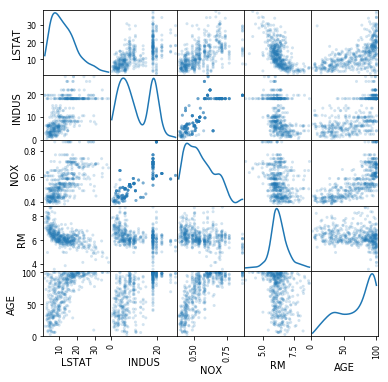

In [41]:
#First, we create the new dataset and look for relationships between the variables

from pandas.plotting import scatter_matrix

y = boston['MEDV']
X = boston[['LSTAT','INDUS', 'NOX', 'RM', 'AGE']]

boston2=boston[['LSTAT','INDUS', 'NOX', 'RM', 'AGE','MEDV']]

scatter_matrix(X, alpha=0.2, figsize=(6, 6), diagonal='kde')
print("Se encuentran relaciones entre las variables: RML/LSTAT, AGE/LSTAT, AGE/NOX, principalmente \n pero es dificil decir quetipo de relación")

In [16]:
#We generate the matrix correlation between all the variables in the new dataset
corr = boston2.corr()
corr

,LSTAT,INDUS,NOX,RM,AGE,MEDV
LSTAT,1.000000,0.603800,0.590879,-0.613808,0.602339,-0.737663
INDUS,0.603800,1.000000,0.763651,-0.391676,0.644779,-0.483725
NOX,0.590879,0.763651,1.000000,-0.302188,0.731470,-0.427321
RM,-0.613808,-0.391676,-0.302188,1.000000,-0.240265,0.695360
AGE,0.602339,0.644779,0.731470,-0.240265,1.000000,-0.376955
MEDV,-0.737663,-0.483725,-0.427321,0.695360,-0.376955,1.000000


We find that the following pairs are most correlated: INDUS/NOX, AGE/NOX and RM/MEDV


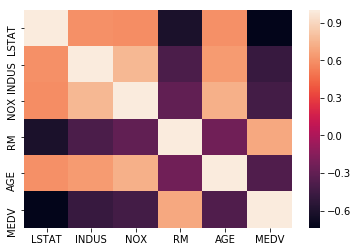

In [17]:
#BONUS: Visualize this matrix as heat map using Pandas, Matplotlib or Seaborn.

import seaborn as sns
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

print("We find that the following pairs are most correlated: INDUS/NOX, AGE/NOX and RM/MEDV")

## EXERCISE 4.4

In [24]:
#First we create the new datasets and its train/test vectors

boston3=boston[['RM','MEDV']]
boston4=boston[['LSTAT','MEDV']]

y3 = boston3['MEDV']
X3 = boston3.drop('MEDV', axis=1)

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.3, random_state=1)

y4 = boston4['MEDV']
X4 = boston4.drop('MEDV', axis=1)

X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.3, random_state=1)

In [27]:
#the we train both datasets on LR models to get the MSE of each test set

from sklearn.metrics import mean_squared_error
import sklearn.neural_network.MLPRegressor
n_hidden_neurons = 1

nn3 = MLPRegressor(activation='identity', solver='lbfgs', hidden_layer_sizes=(n_hidden_neurons,))
nn3.fit(X_train3, y_train3)
test_mse3 = mean_squared_error(y_test3, nn.predict(X_test3))

nn4 = MLPRegressor(activation='identity', solver='lbfgs', hidden_layer_sizes=(n_hidden_neurons,))
nn4.fit(X_train4, y_train4)
test_mse4 = mean_squared_error(y_test4, nn.predict(X_test4))

print("Testing_MSE D1: ", test_mse3)
print("Testing_MSE D2: ", test_mse4)
print("w and wo D1: ", nn3.coefs_)
print("w and wo D2: ", nn4.coefs_)

ModuleNotFoundError: No module named 'sklearn.neural_network.MLPRegressor'

In [23]:
plt.scatter(X3, y3)
plt.xlabel('RM')
plt.ylabel('MEDV')

def lr_h(beta,X3):
    return np.dot(beta, X3.T)

c3=[0.71229455,11.87861731]

#Plot the linear regression
x = np.c_[np.ones(2), [X3.min(), X3.max()]]
plt.plot(x[:, 1], lr_h(c, x), 'r', lw=5)

print("LR D1")

NameError: name 'plt' is not defined

In [21]:
plt.scatter(X4, y4)
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

def lr_h(beta,X4):
    return np.dot(beta, X4.T)

c=[-0.07832926,11.70305027]

#Plot the linear regression
x = np.c_[np.ones(2), [X4.min(), X4.max()]]
plt.plot(x[:, 1], lr_h(c, x), 'r', lw=5)

print("LR D2")

NameError: name 'plt' is not defined

In [22]:
#observamos que el de mejor desempeño es el modelo D1, ya que se ajusta a
#la tendencia positiva de los datos, mientras más grande el RM, más grande el MEDV

# EXERCISE 4.5

In [35]:

y5 = boston['MEDV']
X5 = boston.drop('MEDV', axis=1)

X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, test_size=0.3, random_state=1)

from sklearn.linear_model import LinearRegression

linreg_1= LinearRegression(fit_intercept=False)
linreg_1.fit(X_train5,y_train5)
betas_1 = linreg_1.coef_
betas_1

from sklearn import metrics


print('MSE LinReg:', metrics.mean_squared_error(y_test5,linreg_1.predict(X_test5)))


MSE LinReg: 18.251463409930384


In [37]:
import sklearn.neural_network.MLPRegressor
n_hidden_neurons = 1

nn5 = MLPRegressor(activation='identity', solver='lbfgs', hidden_layer_sizes=(n_hidden_neurons,))
nn5.fit(X_train5, y_train5)
test_mse5 = mean_squared_error(y_test5, nn.predict(X_test5))


print("MSE Using MLPRegressor: ", test_mse4)


ModuleNotFoundError: No module named 'sklearn.neural_network.MLPRegressor'

In [45]:

from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler
sc_x.fit(X5)
X_train_s = sc_x.transform(X_train5)
X_test_s = sc_x.transform(X_test5)


n_hidden_neurons = 1

nnS1 = MLPRegressor(activation='identity', solver='lbfgs', hidden_layer_sizes=(n_hidden_neurons,))
nnS1.fit(X_train_s, y_train5)
test_mse_s = mean_squared_error(y_test5, nn.predict(X_test_s))

print("MSE Using Scaled data: ", test_mse_s)


TypeError: fit() missing 1 required positional argument: 'X'

In [46]:
n_hidden_neurons = 2

nnS1 = MLPRegressor(activation='identity', solver='lbfgs', hidden_layer_sizes=(n_hidden_neurons,))
nnS1.fit(X_train_s, y_train5)
test_mse_s = mean_squared_error(y_test5, nn.predict(X_test_s))

print("MSE Using Scaled data: ", test_mse_s)


NameError: name 'MLPRegressor' is not defined

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(128, 512), random_state=1)
clf.fit(X_train_s, y_train5)

test_mse_s2 = mean_squared_error(y_test5, nn.predict(X_test_s))

print("MSE Using Scaled data NN: ", test_mse_s2)

### - Which model has better performance? Why?
#### entre los modelos evaluados el modelo que menor valor en el MSE obtuvo fue el último con el MultiLayer Perceptron.